In [7]:
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [11]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5472,ham,Well obviously not because all the people in m...,NaN,NaN,NaN
4113,ham,Where are you ? What do you do ? How can you s...,NaN,NaN,NaN
838,spam,We tried to contact you re our offer of New Vi...,NaN,NaN,NaN
5271,ham,So u wan 2 come for our dinner tonight a not?,NaN,NaN,NaN
305,ham,Yup... From what i remb... I think should be c...,NaN,NaN,NaN


In [12]:
df.shape

(5572, 5)

In [13]:
#1.Data cleaning
#2.EDA
#3.Text preprocessing
#4.Model building
#5. Evaluation
#6.Improvement
#7.Website
#8.Deploy

## 1 Data Cleaning

In [14]:
#now lets check whether all of the data is necessary or not

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [18]:
#last 3 columns are not very important so lets drop them
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace  = True)

In [19]:
df.sample(5)

,v1,v2
44,ham,Great! I hope you like your man well endowed. ...
2502,ham,Ola would get back to you maybe not today but ...
943,ham,And also I've sorta blown him off a couple tim...
491,spam,Congrats! 1 year special cinema pass for 2 is ...
3355,ham,Ok not a problem will get them a taxi. C ing ...


In [22]:
#renaming the columns 
df.rename(columns = {'v1' : 'target','v2' : 'text'}, inplace = True)
df.sample(5)

,target,text
3962,ham,If you ask her or she say any please message.
4801,ham,Reverse is cheating. That is not mathematics.
3749,ham,"Buzz! Hey, my Love ! I think of you and hope y..."
5168,ham,"IÛ÷ve got some salt, you can rub it in my ope..."
2928,ham,Where wuld I be without my baby? The thought a...


In [23]:
# we want the target value to be numerical not text(spam/ham)

In [32]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [33]:
df['target'] = encoder.fit_transform(df['target'])

In [34]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
# missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [36]:
#check for duplicate values
df.duplicated().sum()

403

In [37]:
#remove duplicates
df = df.drop_duplicates(keep = 'first')

In [38]:
df.duplicated().sum()

0

In [39]:
df.shape

(5169, 2)

## 2.EDA

In [40]:
#check how much of the data is spam and ham 
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [41]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

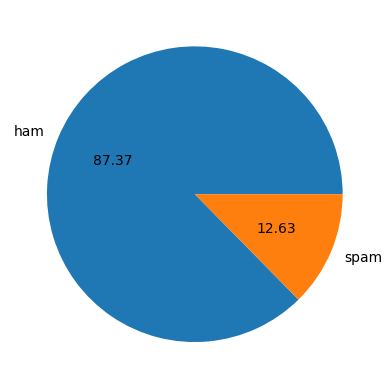

In [43]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()
#plt.show used to show only the pie chart and not some extra metadata

In [44]:
#from the pie chart we can observe that the data is imbalance


In [45]:
#now for the classification of the number of charrcter , words and sentences in the sms

In [47]:
import nltk

In [48]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Krishna Kumar
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [50]:
 #number of characters in the sms

In [55]:
df['num_characters']=df['text'].apply(len)

C:\Users\Krishna Kumar Gupta\AppData\Local\Temp\ipykernel_14788\2419963407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [56]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [59]:
import nltk

In [60]:
nltk.download('punkt_tab')
#these are used for word_tokenizer

[nltk_data] Downloading package punkt_tab to C:\Users\Krishna Kumar
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [63]:
#now for the numebr of words-
# df['text'].apply(lambda x:nltk.word_tokenize(x))
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Krishna Kumar Gupta\AppData\Local\Temp\ipykernel_14788\3862910343.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [64]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [65]:
df['text'].apply(lambda x:nltk.sent_tokenize(x))
#on the basis of the sentence it classifies the data

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [66]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


C:\Users\Krishna Kumar Gupta\AppData\Local\Temp\ipykernel_14788\1401909558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [67]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [68]:
# now all the data in terms of numebr s of words , sentences , cahracters-
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [69]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [70]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [71]:
#we can get the idea from hwre how data about spam and ham is different (mean data)


In [72]:
#now we will plot the histogram for this data

In [73]:
!pip install seaborn

In [74]:
import seaborn as sns

<AxesSubplot: xlabel='num_characters', ylabel='Count'>

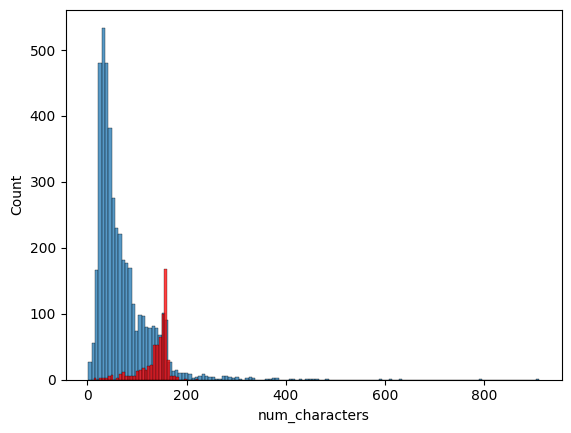

In [76]:
#histogram for the num of charcters in ham & spam
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color = 'red')

<AxesSubplot: xlabel='num_words', ylabel='Count'>

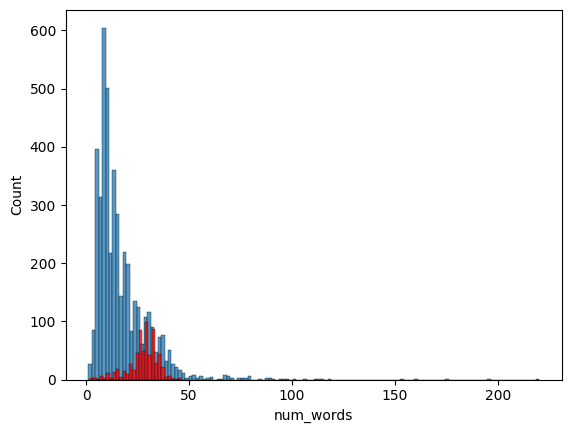

In [77]:
#histogram for the num of words in ham & spam
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color = 'red')

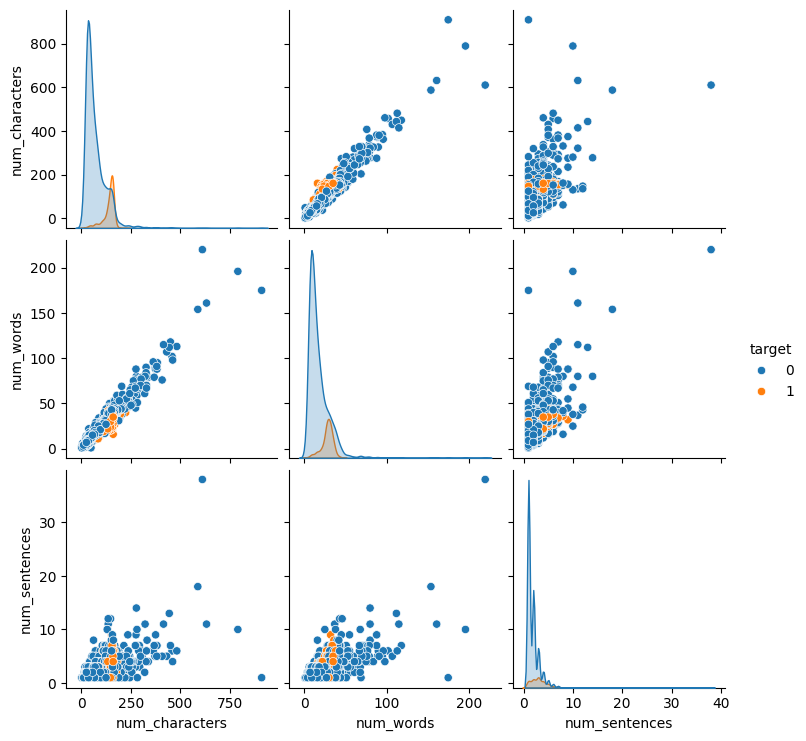

In [78]:
#relation between the num of characters and words and sentences
sns.pairplot(df, hue='target')

In [79]:
df.corr()

C:\Users\Krishna Kumar Gupta\AppData\Local\Temp\ipykernel_14788\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


In [80]:
#df.corr() used for correlation between the different column

C:\Users\Krishna Kumar Gupta\AppData\Local\Temp\ipykernel_14788\4168291136.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True )


<AxesSubplot: >

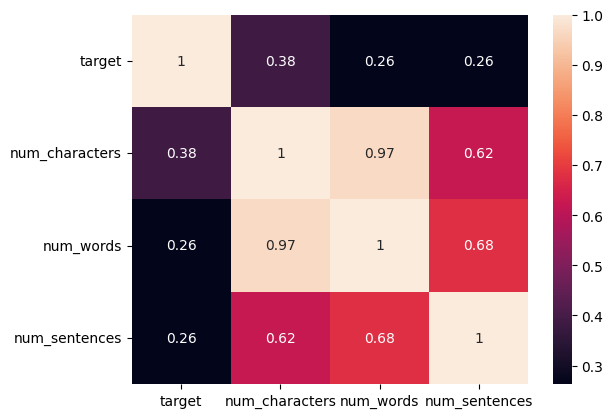

In [81]:
sns.heatmap(df.corr(), annot = True )

In [82]:
#we will keep the correlation between the target and number of characters since high correlation among others

## 3. data preprocessing

• Lower case 
• Tokenization 
• Removing special characters 
• Removing stop words and punctuation 
• Stemming

In [89]:
#we will create a fucntion which will do all these steps in one go-
#example-
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    return text

In [90]:
transform_text('Hi how are you')

['hi', 'how', 'are', 'you']

In [91]:
#tekenization done(example)

In [96]:
#example-
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    return y

In [98]:
transform_text('Hi how are you 600$%# iuo')

['hi', 'how', 'are', 'you', '600', 'iuo']

In [99]:
#special charcters have been removed 

In [100]:
#now removing stop words and punctuation 

In [102]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Krishna Kumar
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [103]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [104]:
#stopwords list

In [105]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [106]:
#all the pucntuation marks


In [114]:
#example-
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text: 
        if i not in stopwords.words('english') and i not in string.punctuation: 
            y.append(i)
            
    return y

In [115]:
transform_text('Hi how are you Niggesh 600$%# iuo???')

['hi', 'niggesh', '600', 'iuo']

In [116]:
#now we will go for the stemming removal

In [119]:
#example 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [120]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text: 
        if i not in stopwords.words('english') and i not in string.punctuation: 
            y.append(i)

    text = y[:]
    y.clear()

    for i in text: 
        y.append(ps.stem(i))
        
    return " ".join(y)

In [122]:
transform_text('Hi how are acting singing drinking shitting you Niggesh 600$%# iuo???')

'hi act sing drink shit niggesh 600 iuo'

In [123]:
#now the final function has been made
#we can check by manually picking up the sentences as- df['text'][100]
#and put in the transform function

In [124]:
#now new column tranformed text-

In [125]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\Krishna Kumar Gupta\AppData\Local\Temp\ipykernel_14788\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [126]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [127]:
#now we will make word cloud that will enlarge the most important word-

In [128]:
!pip install wordcloud

In [137]:
from wordcloud import WordCloud
wc = WordCloud(width = 1000, height = 1000, min_font_size=10, background_color = 'white')

In [138]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep =" "))
#this is adding the tranformed text of spam to a empty string

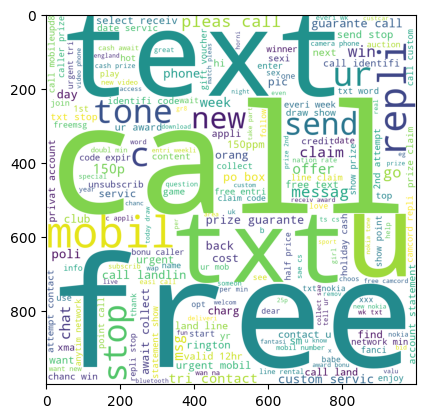

In [140]:
#now to display it(wordcloud)-
plt.imshow(spam_wc)

In [141]:
#this is a word cloud ( the bugger the number more the correlation with target)

In [142]:
#for ham
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep =" "))

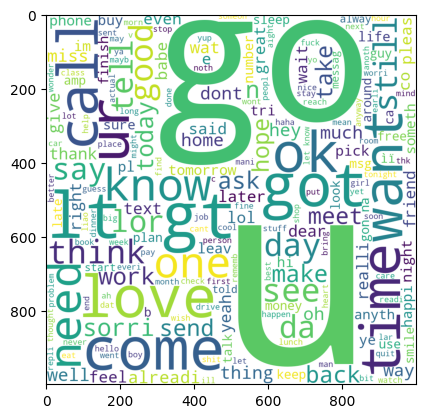

In [143]:
plt.imshow(ham_wc)

In [144]:
#word cloud for the ham wordspace

In [145]:
#now we will try to get the top 30 most common words in the spam wordspace-

In [149]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [150]:
len(spam_corpus)

9939

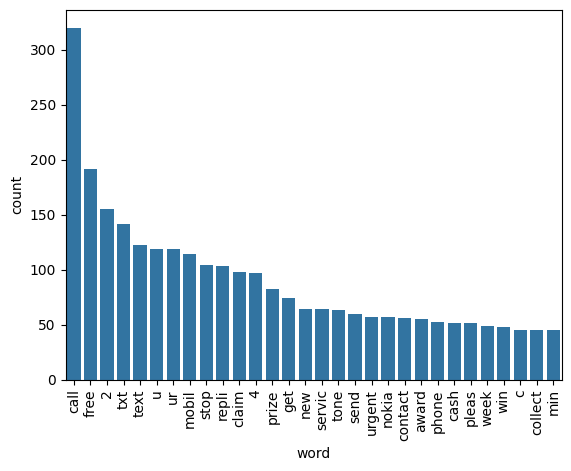

In [157]:
from collections import Counter

# Get the top 30 most common words from spam_corpus
common_words = pd.DataFrame(Counter(spam_corpus).most_common(30))

# Rename the columns for better understanding
common_words.columns = ['word', 'count']

# Use keyword arguments for x and y
sns.barplot(x='word', y='count', data=common_words)

# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


In [ ]:
#now we will try to get the top 30 most common words in the ham wordspace-

In [159]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [160]:
len(ham_corpus)

35404

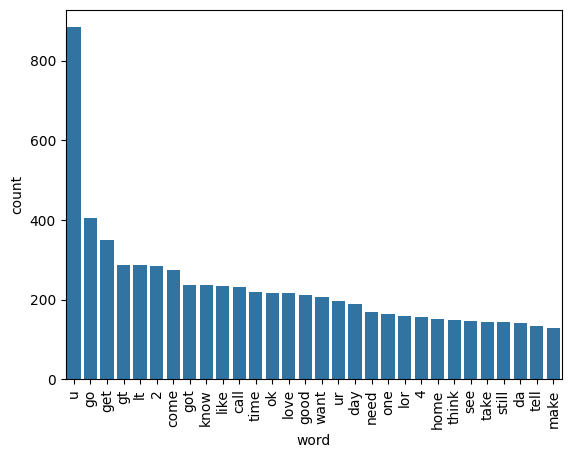

In [161]:
from collections import Counter

# Get the top 30 most common words from spam_corpus
common_words = pd.DataFrame(Counter(ham_corpus).most_common(30))

# Rename the columns for better understanding
common_words.columns = ['word', 'count']

# Use keyword arguments for x and y
sns.barplot(x='word', y='count', data=common_words)

# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

## 4. Model Building

1.Naive Bayes

In [162]:
#convert the text to vectors ( numbers)- vectorize the text

In [163]:
#bag of words

In [213]:
#we are using the countvectorizer to convert the text data into numerical format 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)
# max_features = 3000 limits the corpus to most common 3000 words

In [248]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [249]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)


#applied for the X 
#min max scalar used not the standard scalar since it gives negative values too which NB doesnt accept

#scalling didnt gave us much improved result(infact the precission of top models were down), so we will not integerte scalling here

In [ ]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

#this also doesnt made any improvement to our existing (max_features = 3000 [best]) model

In [215]:
X.shape

(5169, 3000)

In [216]:
y = df['target'].values

In [217]:
 from sklearn.model_selection import train_test_split

In [218]:
# X_train, y_train → Training set (80% of data)
# X_test, y_test → Testing set (20% of data)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [219]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
# accuracy_score → Measures overall correctness.
# confusion_matrix → Shows true positive, true negative, false positive, false negative counts.
# precision_score → Measures how many predicted spam messages are actually spam.
#different classifiers of niave bayes are being used for accuracy and precission

In [220]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
# GaussianNB → Assumes that features follow a normal (Gaussian) distribution.
# MultinomialNB → Works well for discrete counts like word frequencies in text.
# BernoulliNB → Works with binary features (e.g., word present or not).

In [221]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
# GaussianNB is not ideal for text data because text-based features are not normally distributed.

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [222]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
# MultinomialNB works best for text data because it handles discrete counts well.

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [223]:
bnb.fit(X_train,y_train)
# y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
# BernoulliNB is also well-suited for text data, especially when considering binary features (like presence or absence of a word).

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [224]:
# tf idf --> MultinomialNB 

In [225]:
#now we will compare more machine learning algos 

In [192]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 12.7 MB/s eta 0:00:12
    --------------------------------------- 3.1/150.0 MB 11.5 MB/s eta 0:00:13
   - -------------------------------------- 5.2/150.0 MB 11.0 MB/s eta 0:00:14
   - -------------------------------------- 6.0/150.0 MB 8.8 MB/s eta 0:00:17
   - -------------------------------------- 6.6/150.0 MB 7.2 MB/s eta 0:00:20
   -- ------------------------------------- 7.6/150.0 MB 6.9 MB/s eta 0:00:21
   -- ------------------------------------- 8.7/150.0 MB 6.5 MB/s eta 0:00:22
   -- ------------------------------------- 9.4/150.0 MB 6.1 MB/s eta 0:00:24
   -- ------------------------------------- 10.7/150.0 MB 6.0 MB/s eta 0:00:24
   --- ------------------------------------ 12.1/150.0 MB 6.1 MB/s eta 0:00:23
   --- ------------------------------------ 12.8/150.0 MB 6.0 MB/s eta 0:00:23
   --- ------------------------------------ 13.4/150.0 MB 5.6 MB/

In [226]:
#different algos imported
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [227]:
#object creation for each of the algo
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [228]:
# mapping algo name to the respective object name
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [229]:
#fucntion created to check the accuracy and precission of each algo
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [230]:
#eg- 
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [231]:
#using loop capture the accuray and precission of each algo 
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8415841584158416
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8488372093023255
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9482758620689655


In [232]:
#convert all this data into data frame
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [233]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.948276
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
6,AdaBoost,0.924565,0.848837


In [234]:
#ETC is variation of random forest
#NB	0.959381	1.000000
#RF	0.971954	1.000000
#ETC	0.972921	0.982456
#SVC	0.972921	0.974138
#top algos

In [235]:
#graph for all the algos-

In [236]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1
# pd.melt() is used to transform a wide-format DataFrame into a long-format DataFrame.

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,GBDT,Accuracy,0.946809
8,BgC,Accuracy,0.958414
9,AdaBoost,Accuracy,0.924565


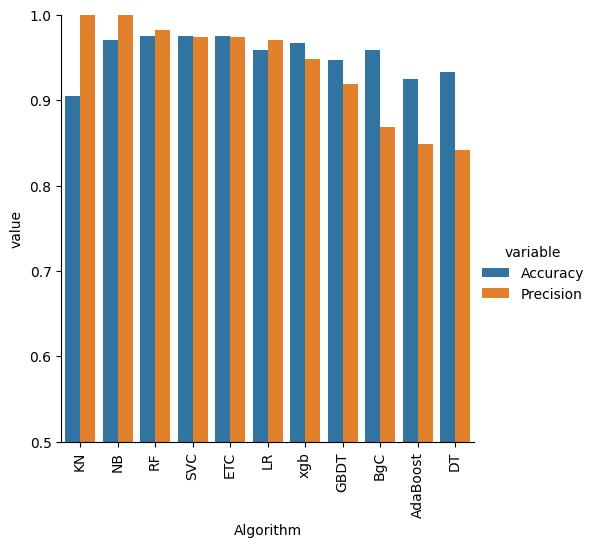

In [237]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# MODEL IMPROVEMENT

In [238]:
# 1. Change the max_features parameter of TfIdf


In [239]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [240]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [241]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [244]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [245]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [246]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling,Precision_scaling,Accuracy_num_chars_x,Precision_num_chars_x,Accuracy_num_chars_y,Precision_num_chars_y
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,xgb,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276
7,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
8,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,AdaBoost,0.924565,0.848837,0.924565,0.848837,0.924565,0.848837,0.924565,0.848837


In [247]:
#by limiting the max feature we got a better result regarding the algos and their precission and accuracy

# voting classifier

In [250]:
# The VotingClassifier combines multiple models (classifiers) to create a stronger predictive model by taking a vote 
# from the predictions of individual classifiers.

In [254]:
# Voting Classifier
#we have used the top classifiers to combine which are- svc, mnb, etc

In [255]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [256]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
# Why "Soft" Voting?
# "Soft" voting gives better performance if the models are well-calibrated because it considers the predicted confidence (probability) of each classifier.
# If there's a conflict between classifiers, the one with higher confidence influences the decision more.

In [257]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [258]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [259]:
#this is the accuracy of the model after combining the svc, mnb, etc classifiers

In [265]:
# now we will use stacking-
# Stacking:
# After the base models make their predictions, their outputs are used as input features for the final estimator (or level-1 model).
# The final estimator (RandomForestClassifier) learns how to combine the predictions from the base models.
# This is more advanced than voting because it allows the final model to learn the best way to combine predictions rather than just averaging or majority voting.

In [260]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [261]:
from sklearn.ensemble import StackingClassifier

In [262]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [269]:
# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))
clf.fit(X_train,y_train)
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9709864603481625
Precision 1.0


In [266]:
#both stacking and voting didnt gave us any improved result so we will go with MultinomialNB

In [270]:
#creating pipeline - three steps
# 1.preprocess (transform_text function)
# 2.vectorize (text to numeric)
# 3.Applying algo
# these steps will be done on any new sms

In [271]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
# we are using the pickle module to serialize and save objects to files so that they can be reused later without retraining the model. 
# Purpose:
# Saves the vectorizer and model so you don't need to retrain them every time.
# You can load them later with pickle.load() to directly use them for predictions.